# DAT257x: Reinforcement Learning Explained

## Lab 5: Temporal Difference Learning

### Exercise 5.4: Q-Learning Agent

In [2]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 
    
from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib.envs.cliff_walking import CliffWalkingEnv
from lib.simulation import Experiment

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
class Agent(object):  
        
    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, state):
        raise NotImplementedError

In [4]:
import math

class QLearningAgent(Agent):
    
    def __init__(self, actions, epsilon=0.01, alpha=0.5, gamma=1):
        super(QLearningAgent, self).__init__(actions)
        
        ## TODO 1
        ## Initialize empty dictionary here
        ## In addition, initialize the value of epsilon, alpha and gamma
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.Q_s_a = {}

    def stateToString(self, state):
        mystring = ""
        if np.isscalar(state):
            mystring = str(state)
        else:
            for digit in state:
                mystring += str(digit)
        return mystring    
    
    def act(self, state):
        stateStr = self.stateToString(state)      
        
        
        ## TODO 2
        ## Implement epsilon greedy policy here
        
        for a in self.actions:
            try:
                if self.Q_s_a[stateStr][a] not in self.Q_s_a[stateStr].values():
                    self.Q_s_a[stateStr][a] = 0
            except KeyError:
                try:
                    self.Q_s_a[stateStr][a] = 0
                except KeyError:
                    self.Q_s_a[stateStr] = {}
                    self.Q_s_a[stateStr][a] = 0
        
        # Create an empty key for the state if there is no state-action pair yet to avoid exceptions further
        """
        try:
            temp = self.Q_s_a[stateStr].values()
        except KeyError:
            self.Q_s_a[stateStr] = {}
            """
                                
        choice = None
        if self.epsilon == 0:
            choice = 0
        elif self.epsilon == 1:
            choice = 1
        else:
            choice = np.random.binomial(1, self.epsilon)
            
            #action = np.random.choice(self.num_actions)
            
        if choice == 0:
            try:
                Q_s_as = list(self.Q_s_a[stateStr].values())
                if Q_s_as.count(max(Q_s_as)) > 1:
                    best = [i for i in range(self.num_actions) if Q_s_as[i] == max(Q_s_as)]
                    action = np.random.choice(best)
#                 if (len(set(self.Q_s_a[stateStr].values())) < 3):
#                     action = np.random.randint(0, self.num_actions)
#                 elif len([key for key, value in self.Q_s_a[stateStr].items() if value == max(self.Q_s_a[stateStr].values())]):
#                     action = np.random.randint(0, self.num_actions)
                else:
                    action = max(self.Q_s_a[stateStr], key = self.Q_s_a[stateStr].get)
                    """
                    max_val = max(self.Q_s_a[stateStr].values())
                    max_keys = [key for key, value in self.Q_s_a[stateStr].items() if value == max_val]
                    if len(max_keys) > 1:
                        action = np.random.choice(max_keys)
                    else:
                        action = max_keys[0]
                    """
                    #action = max(self.Q_s_a[stateStr], key = self.Q_s_a[stateStr].get)
            except ValueError:
                action = np.random.randint(0, self.num_actions)
            except KeyError:
                action = np.random.randint(0, self.num_actions)
        else:
            action = np.random.randint(0, self.num_actions) 
            
            #if (len(set(self.Q_s_a[stateStr].values())) < 4) and (len(set(self.Q_s_a[stateStr].keys())) == 4):
            
#         if choice == 0:
#             try:
#                 action = max(self.Q_s_a[stateStr], key = self.Q_s_a[stateStr].get)
#             except ValueError:
#                 action = np.random.randint(0, self.num_actions)
#             except KeyError:
#                 action = np.random.randint(0, self.num_actions)
#         else:
#             action = np.random.randint(0, self.num_actions) 
                        
        return action
    
    def learn(self, state1, action1, reward, state2, done):
        state1Str = self.stateToString(state1)
        state2Str = self.stateToString(state2)
        
        ## TODO 3
        ## Implement the q-learning update here
        try:
            td_target = reward + self.gamma * max(self.Q_s_a[state2Str].values())
        except KeyError as KeyErr:
            self.Q_s_a[state2Str] = {}
            #self.Q_s_a[state2Str][action2] = 0
            """
            try:
                if math.isnan(self.Q_s_a[state2Str][action1]):
                    self.Q_s_a[state2Str][action1] = 0
            except KeyError:
                self.Q_s_a[state2Str][action1] = 0
                """
            td_target = reward
        except ValueError:
            td_target = reward
        
        try:
            td_delta = td_target - self.Q_s_a[state1Str][action1]
            self.Q_s_a[state1Str][action1] = self.Q_s_a[state1Str][action1] + self.alpha * td_delta
        except KeyError:
            try:
                td_delta = td_target
                self.Q_s_a[state1Str][action1] = self.alpha * td_delta
            except KeyError:
                self.Q_s_a[state1Str] = {}
                td_delta = td_target
                self.Q_s_a[state1Str][action1] = self.alpha * td_delta
        
        """
        Q-learning Update:
        Q(s,a) <- Q(s,a) + alpha * (reward + gamma * max(Q(s')) - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * (td_target - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * td_delta
        """

<IPython.core.display.Javascript object>


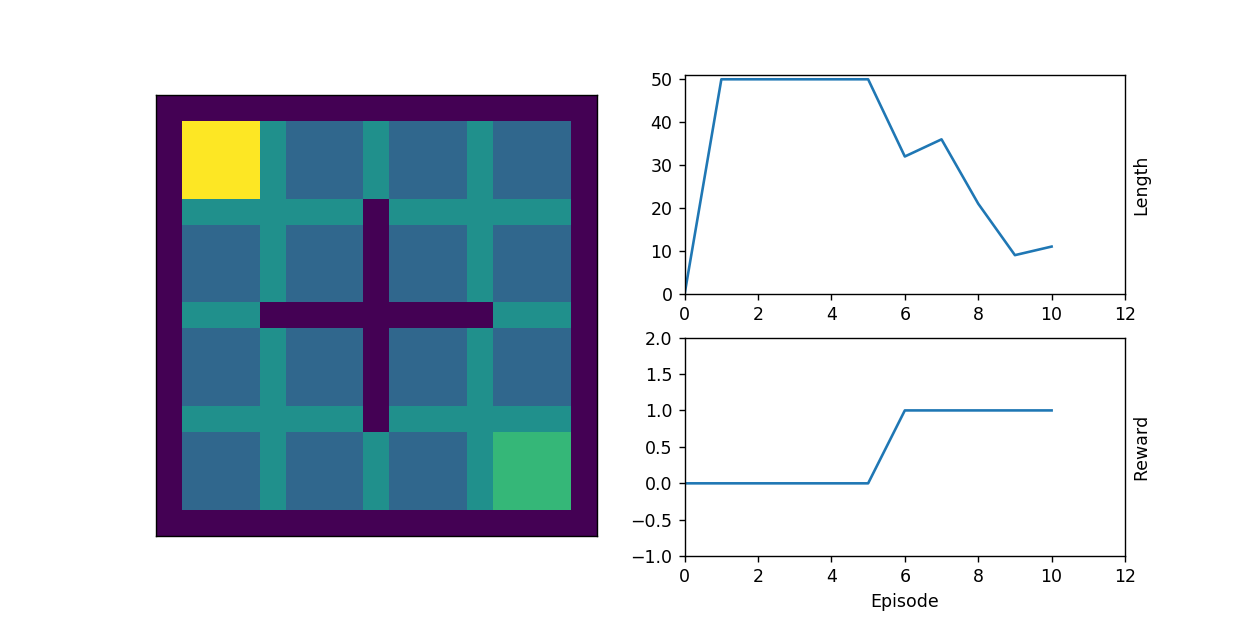

In [6]:
interactive = True
%matplotlib nbagg
env = SimpleRoomsEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(10, interactive)

<Figure size 720x360 with 0 Axes>

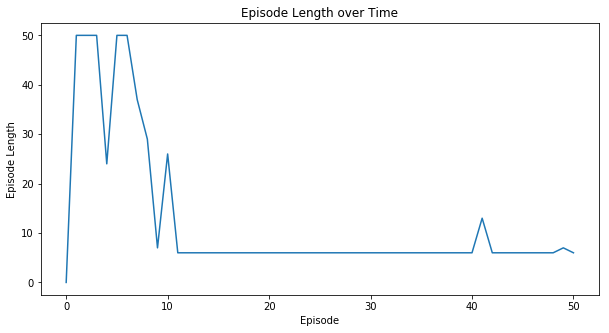

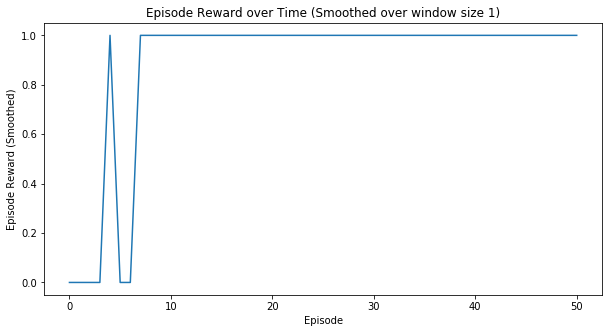

In [9]:
interactive = False
%matplotlib inline
env = SimpleRoomsEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(50, interactive)

<IPython.core.display.Javascript object>


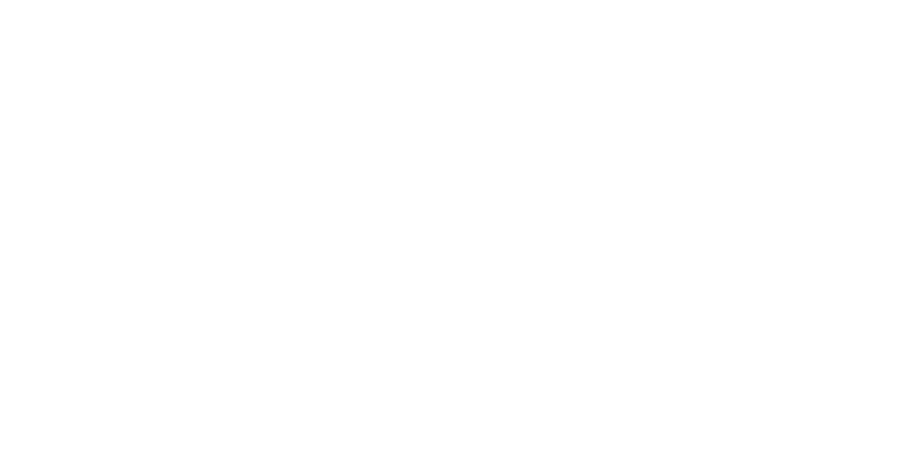

<IPython.core.display.Javascript object>


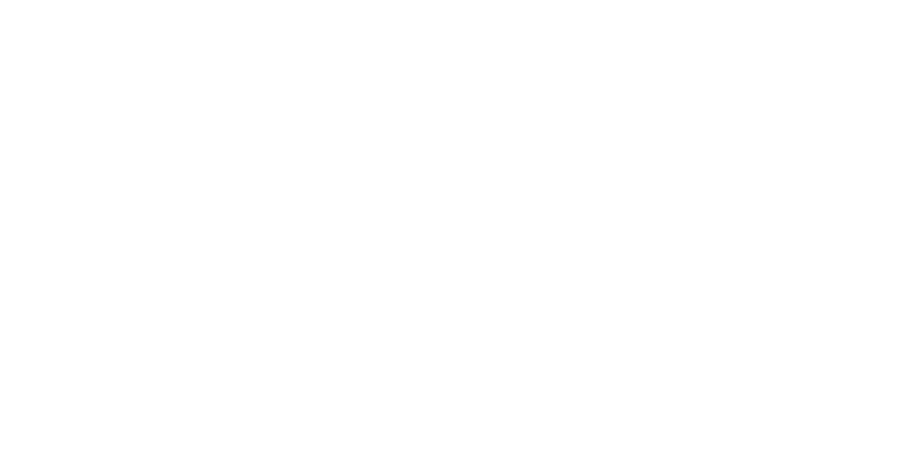

In [10]:
interactive = True
%matplotlib nbagg
env = CliffWalkingEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(10, interactive)

<Figure size 720x360 with 0 Axes>

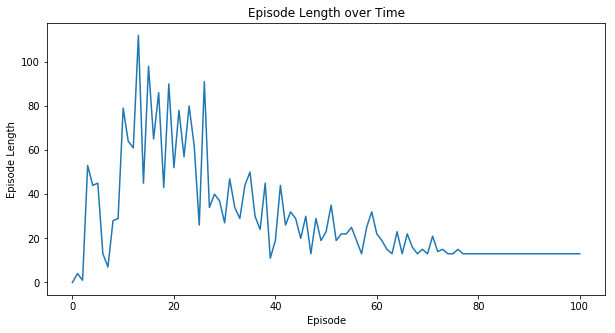

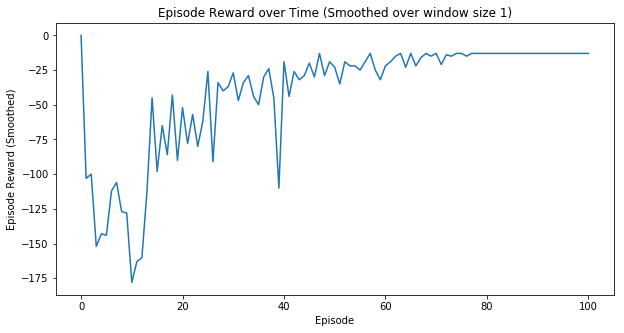

In [12]:
interactive = False
%matplotlib inline
env = CliffWalkingEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(100, interactive)

<Figure size 720x360 with 0 Axes>

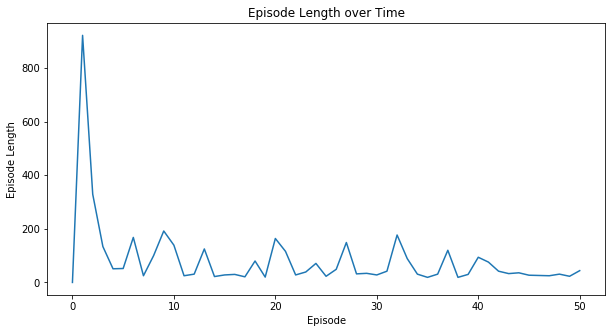

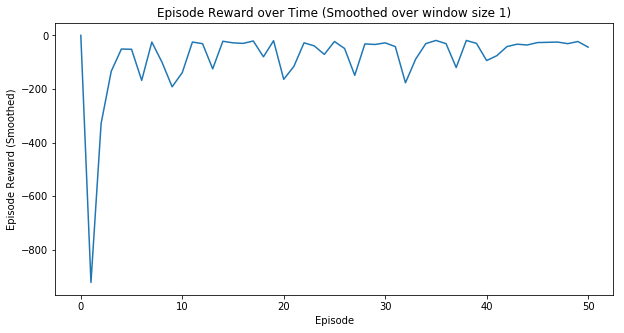

In [13]:
interactive = False
%matplotlib inline
env = WindyGridworldEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(50, interactive)

<Figure size 720x360 with 0 Axes>

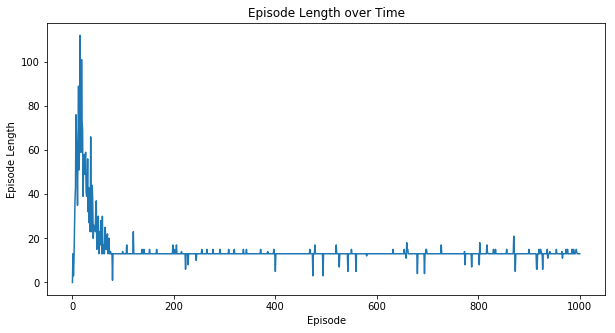

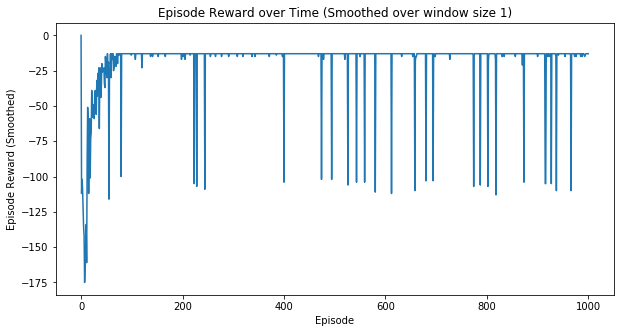

In [15]:
interactive = False
%matplotlib inline
env = CliffWalkingEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(1000, interactive)